# Import Libraries

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
mpl.rcParams['figure.dpi'] = 500

# Import data

In [3]:
data = pd.read_csv('CarPrice_Assignment.txt')

In [4]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Plot Data

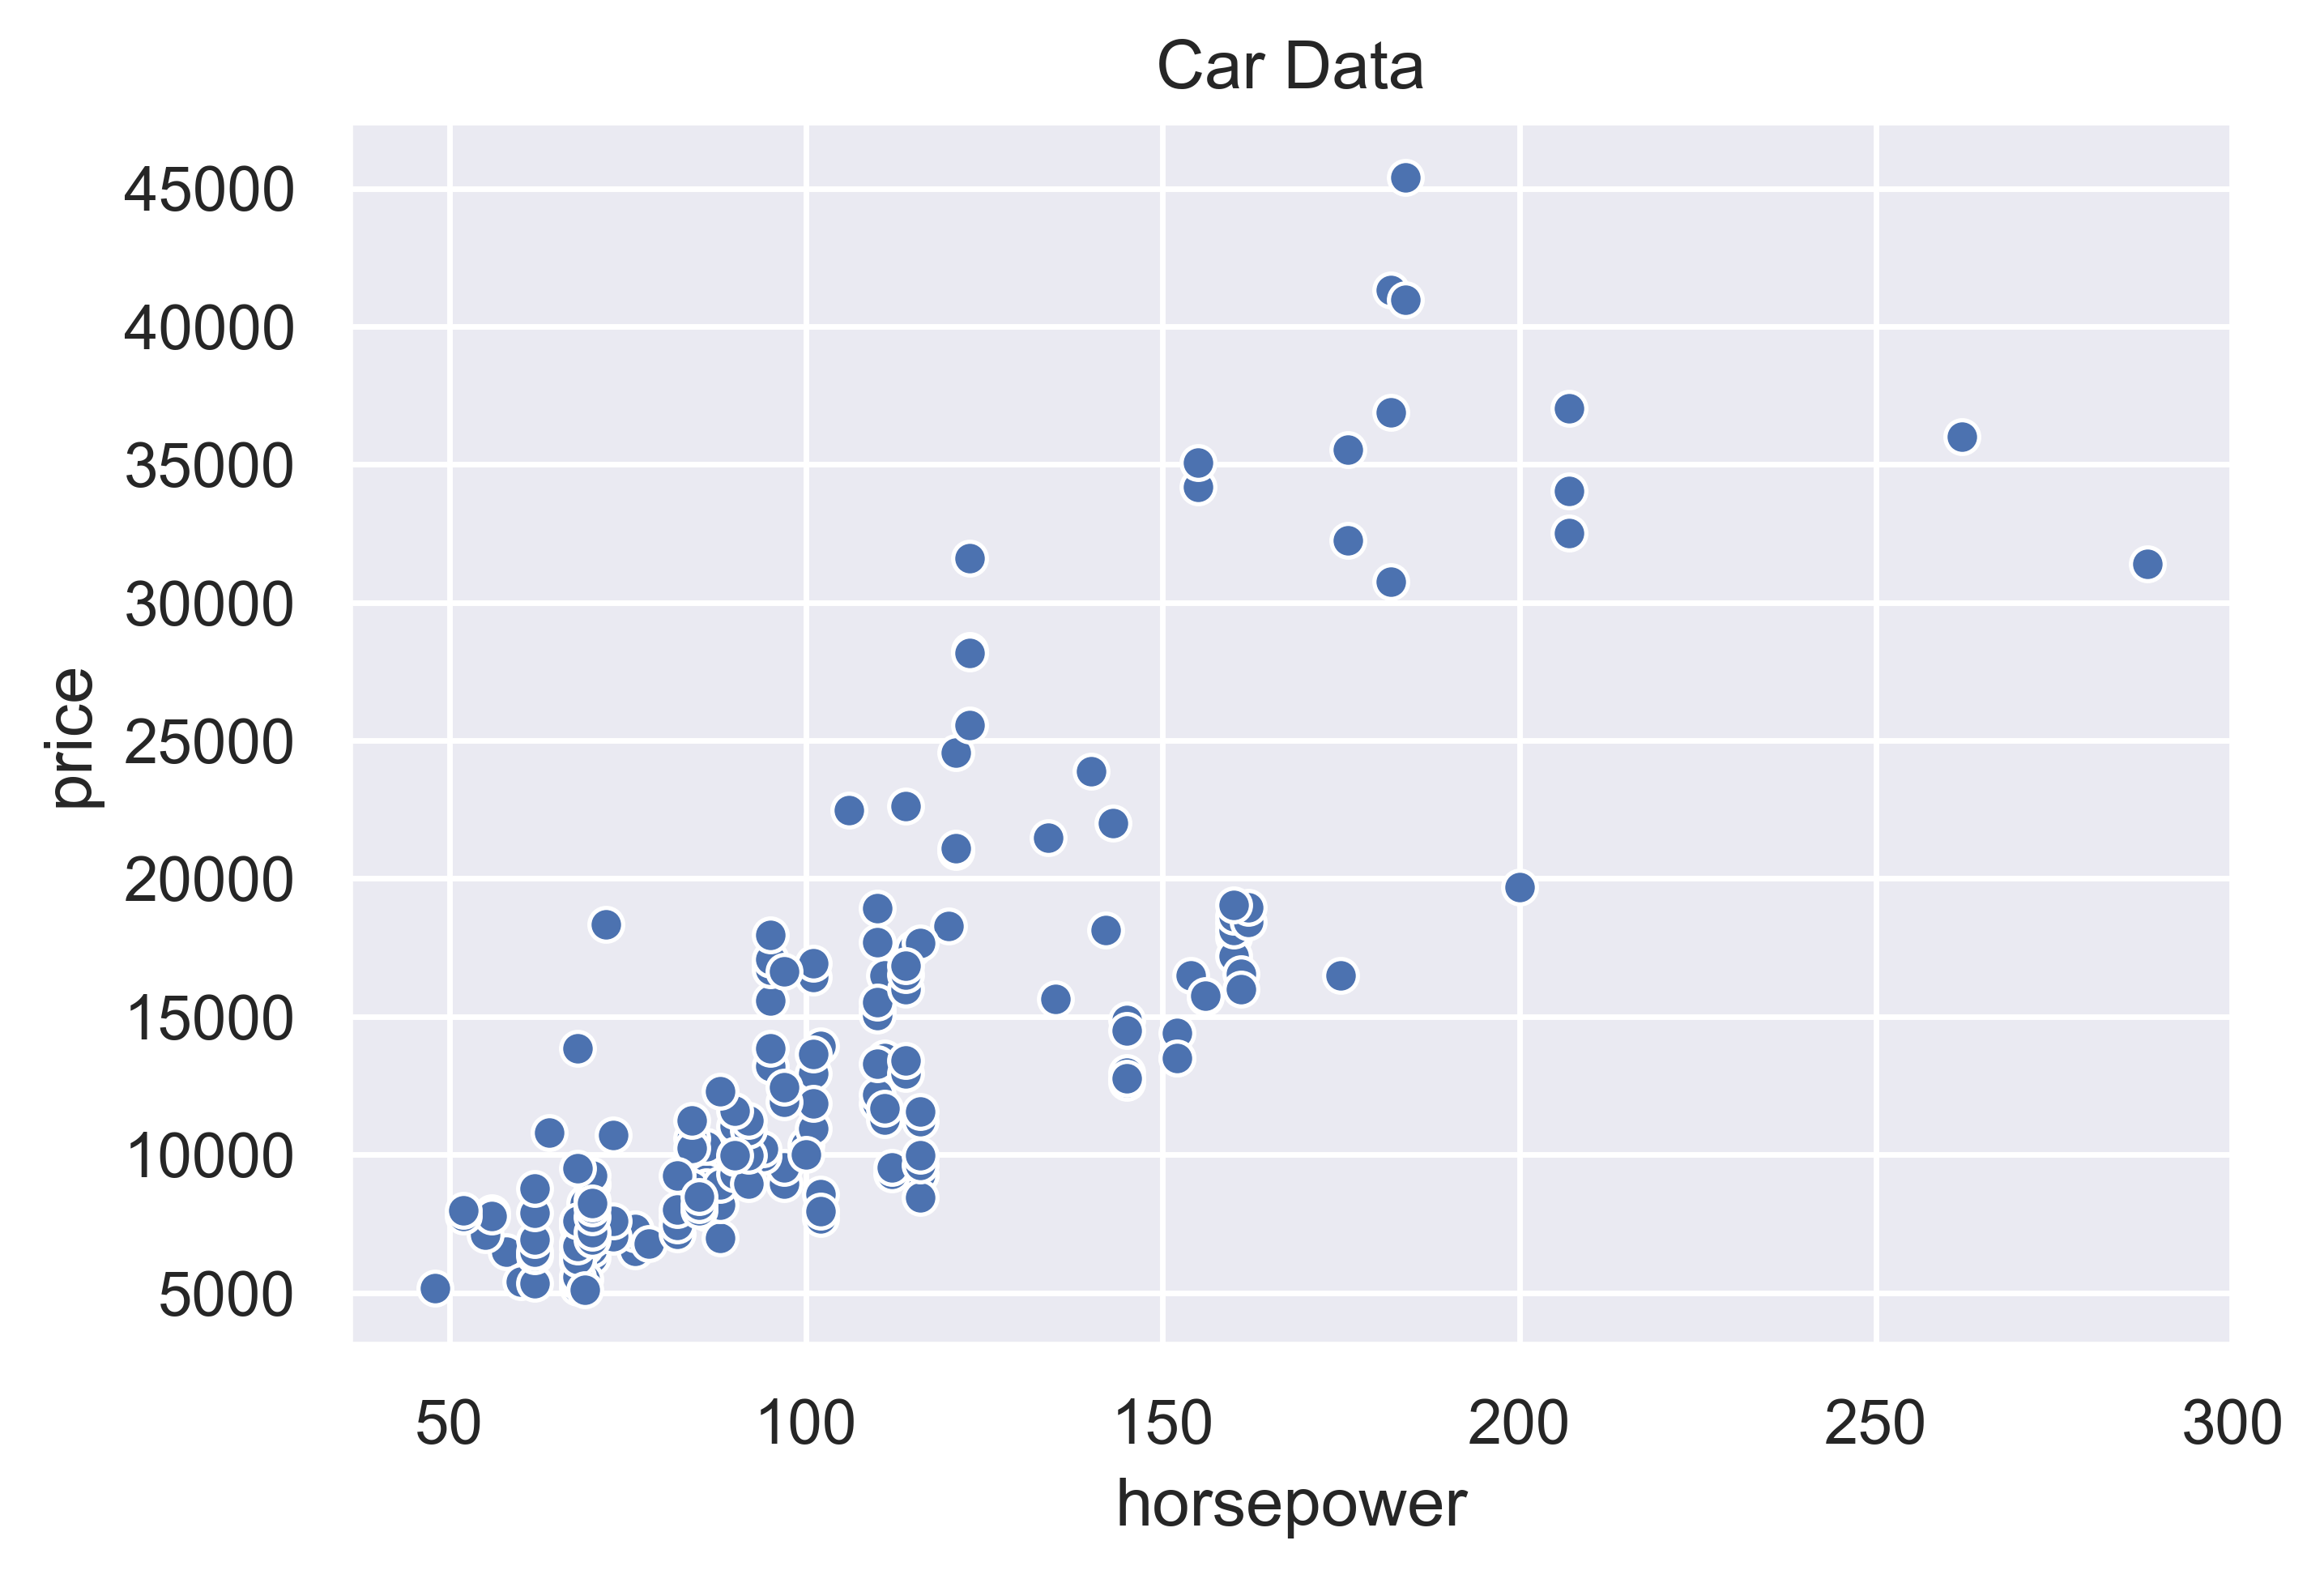

In [5]:
sns.set()
plt.title('Car Data')
sns.scatterplot(x='horsepower', y='price', data=data)

# Define parameters

In [61]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 100
learning_rate = 0.000004

# Define equations for optimization

In [62]:
# Linear regression model
model = nn.Linear(input_size, output_size)
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Perform optimization

In [63]:

loss_log = []
data_x = data['horsepower']
data_y = data['price']

# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(data_x.values[:,None]).float()
    targets = torch.from_numpy(data_y.values[:,None]).float()

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss_log.append(loss.item())
    
    # Backward and optimize
    ## Forget gradients from previous step
    optimizer.zero_grad()
    ## Calculate New Gradients
    loss.backward()
    ## Gradient Descent
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))


Epoch [5/100], Loss: 116224752.0000
Epoch [10/100], Loss: 56303308.0000
Epoch [15/100], Loss: 35218552.0000
Epoch [20/100], Loss: 27799386.0000
Epoch [25/100], Loss: 25188770.0000
Epoch [30/100], Loss: 24270154.0000
Epoch [35/100], Loss: 23946904.0000
Epoch [40/100], Loss: 23833152.0000
Epoch [45/100], Loss: 23793114.0000
Epoch [50/100], Loss: 23779012.0000
Epoch [55/100], Loss: 23774042.0000
Epoch [60/100], Loss: 23772280.0000
Epoch [65/100], Loss: 23771648.0000
Epoch [70/100], Loss: 23771416.0000
Epoch [75/100], Loss: 23771324.0000
Epoch [80/100], Loss: 23771278.0000
Epoch [85/100], Loss: 23771254.0000
Epoch [90/100], Loss: 23771232.0000
Epoch [95/100], Loss: 23771212.0000
Epoch [100/100], Loss: 23771194.0000


# Plot Results

[236984368.0, 196789232.0, 164171728.0, 137703312.0, 116224752.0, 98795352.0, 84651768.0, 73174544.0, 63861028.0, 56303308.0, 50170368.0, 45193628.0, 41155096.0, 37877920.0, 35218552.0, 33060536.0, 31309348.0, 29888298.0, 28735144.0, 27799386.0, 27040036.0, 26423838.0, 25923806.0, 25518040.0, 25188770.0, 24921572.0, 24704746.0, 24528796.0, 24386018.0, 24270154.0, 24176130.0, 24099834.0, 24037920.0, 23987678.0, 23946904.0, 23913818.0, 23886970.0, 23865182.0, 23847502.0, 23833152.0, 23821508.0, 23812058.0, 23804388.0, 23798164.0, 23793114.0, 23789012.0, 23785684.0, 23782986.0, 23780792.0, 23779012.0, 23777570.0, 23776396.0, 23775444.0, 23774670.0, 23774042.0, 23773530.0, 23773116.0, 23772778.0, 23772504.0, 23772280.0, 23772098.0, 23771950.0, 23771830.0, 23771730.0, 23771648.0, 23771582.0, 23771528.0, 23771484.0, 23771444.0, 23771416.0, 23771390.0, 23771368.0, 23771350.0, 23771336.0, 23771324.0, 23771312.0, 23771300.0, 23771292.0, 23771286.0, 23771278.0, 23771272.0, 23771266.0, 23771260.0

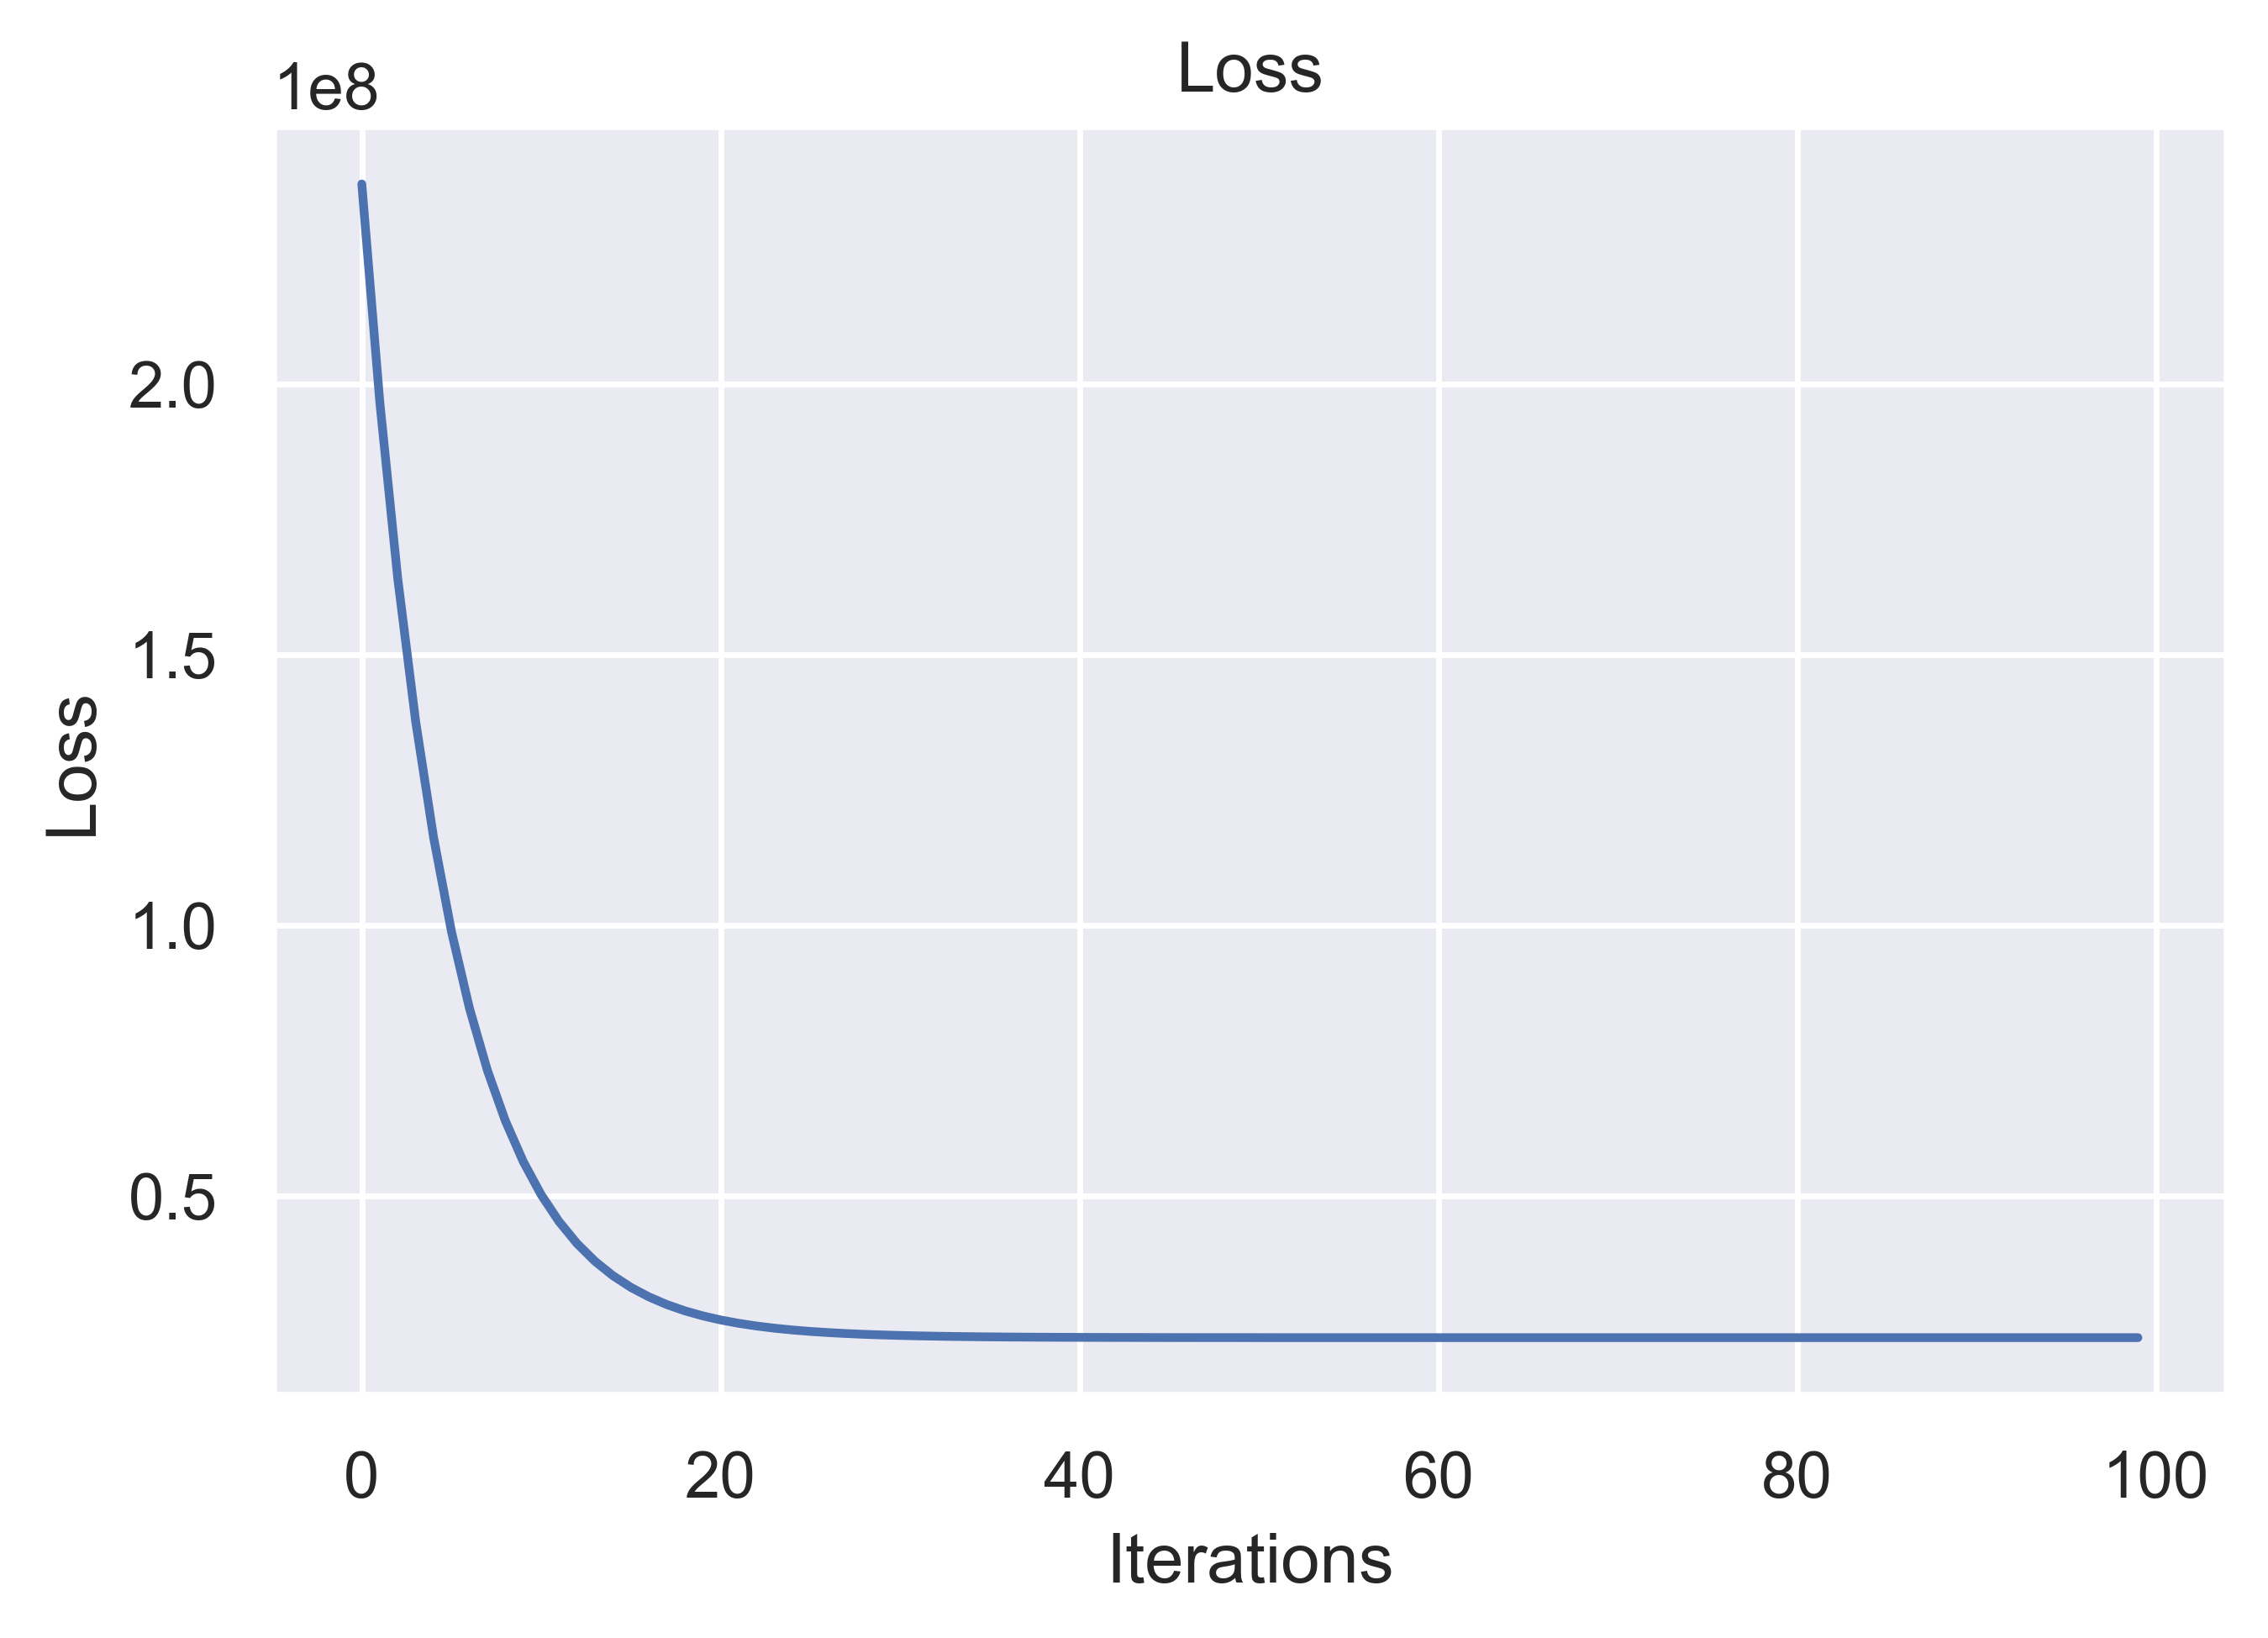

In [64]:
plt.title('Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
print(loss_log)
sns.lineplot(range(len(loss_log)), loss_log)

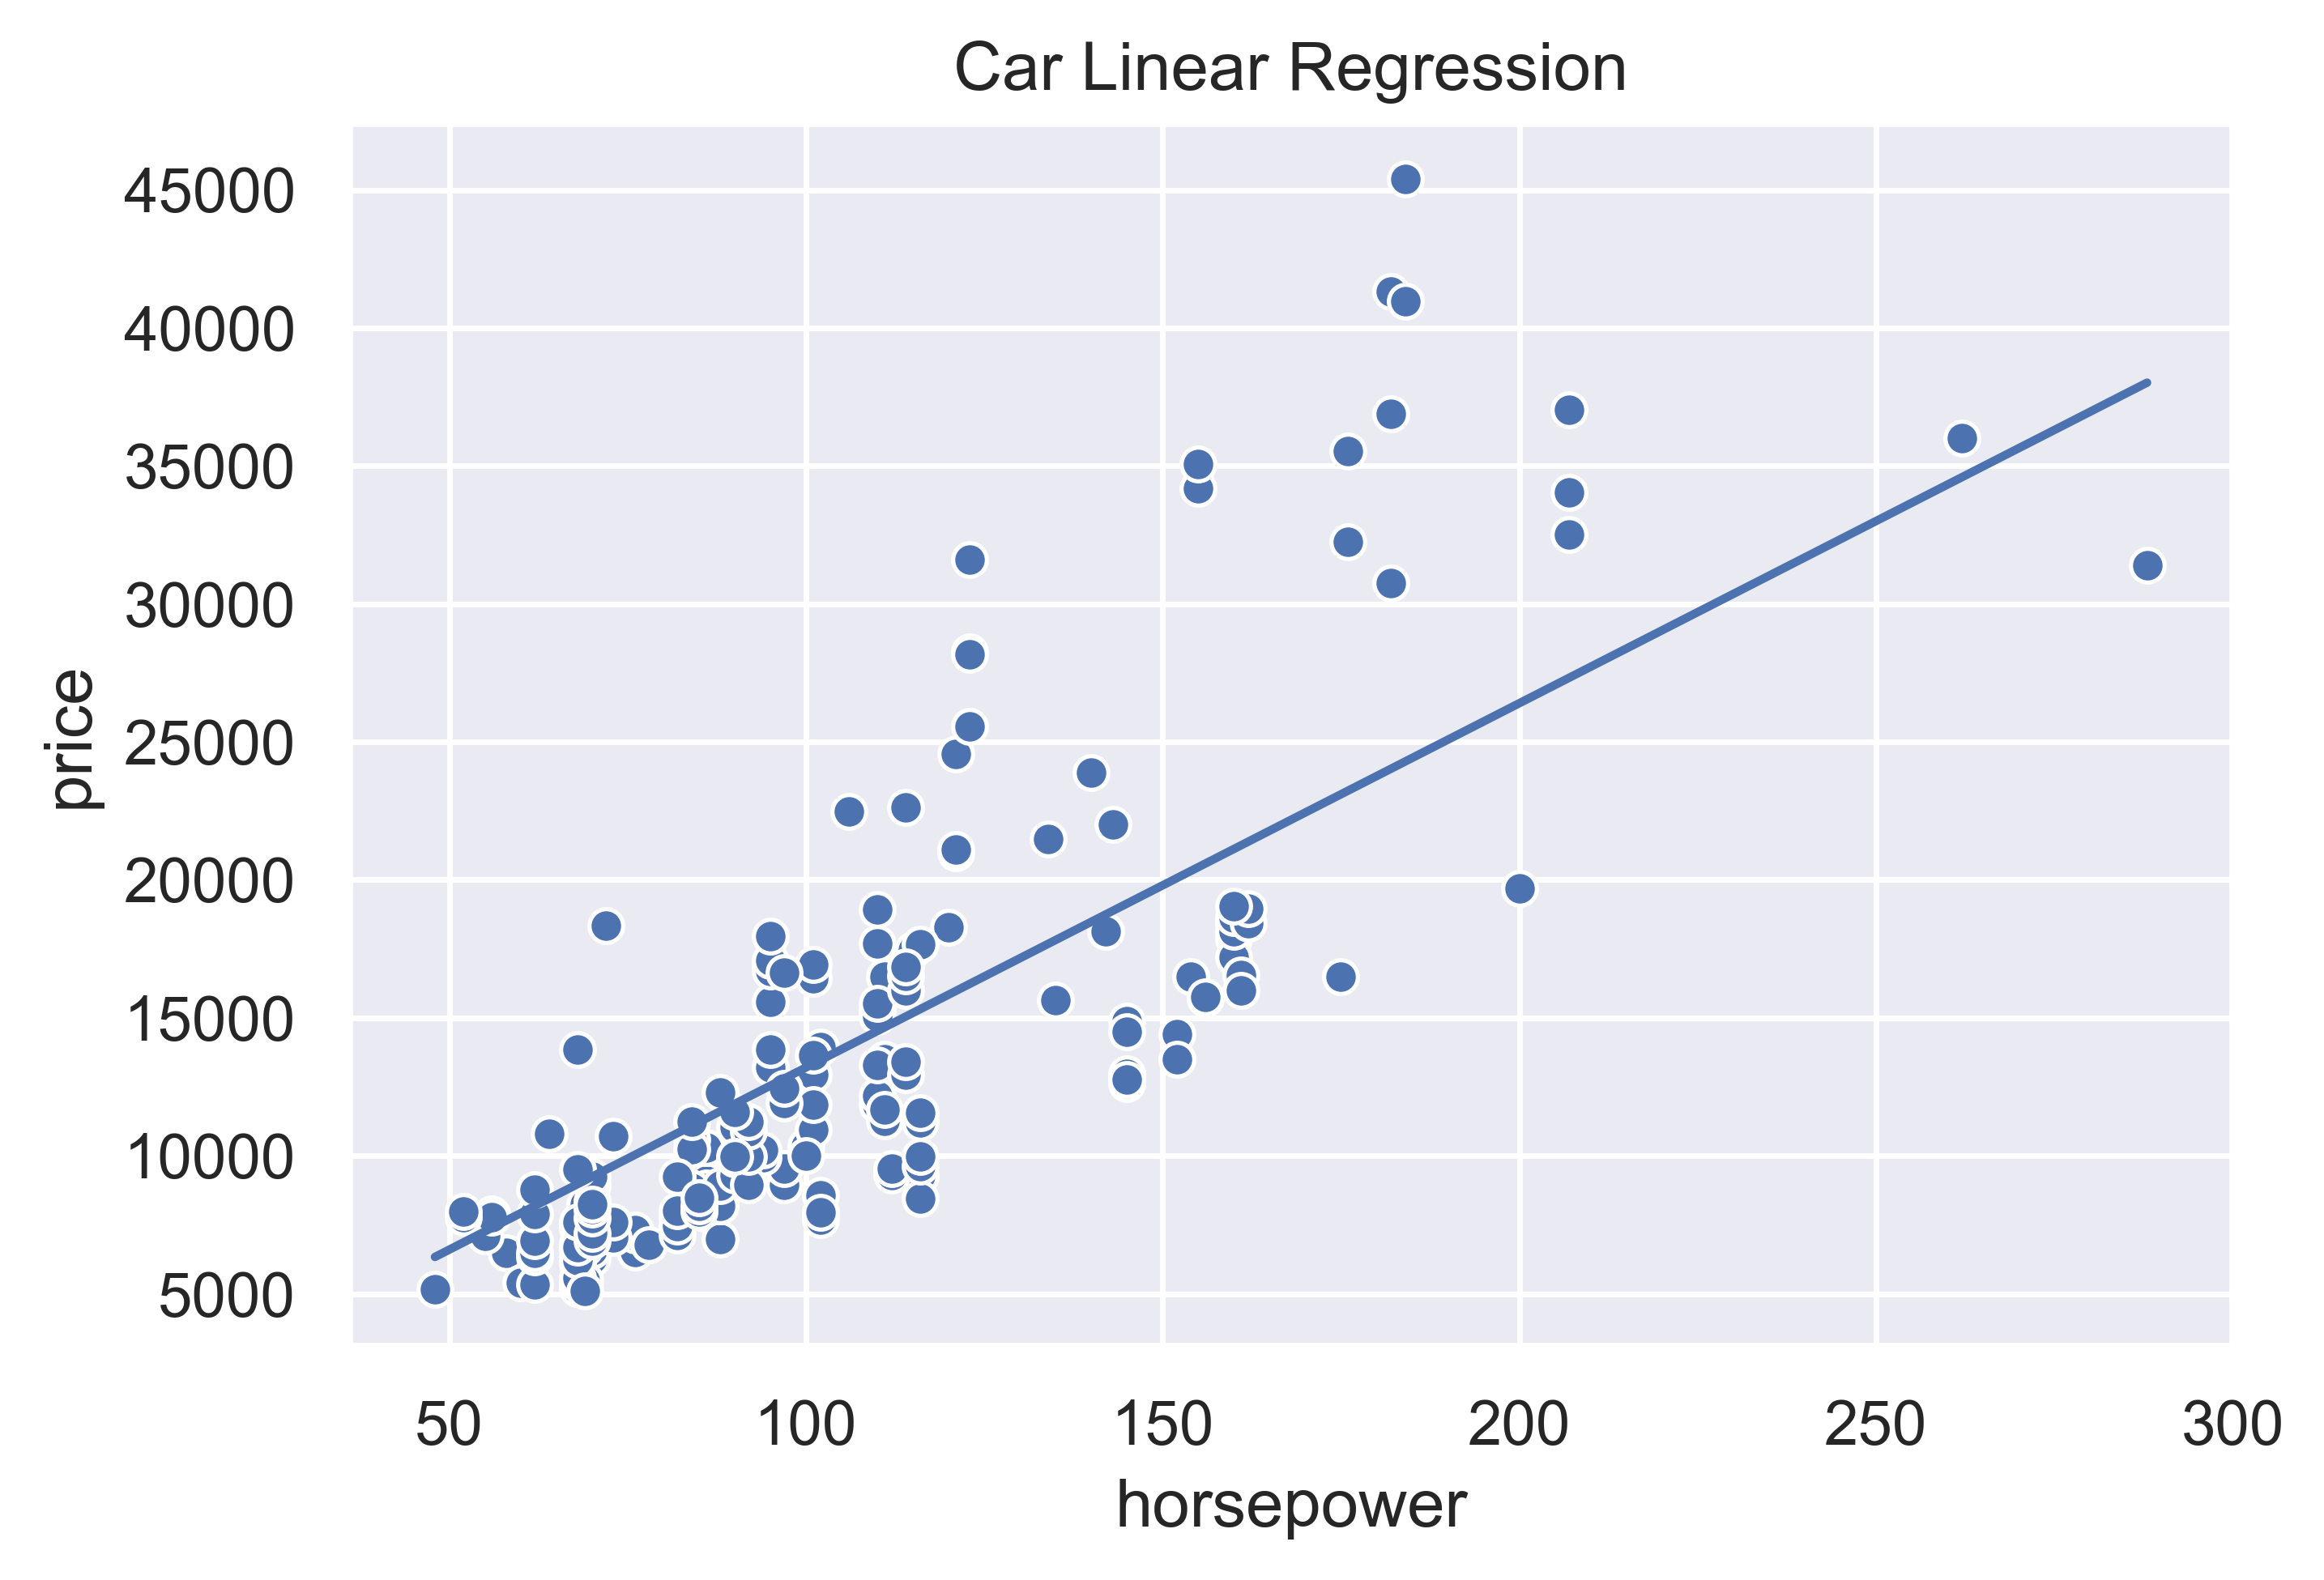

In [65]:
plt.title('Car Linear Regression')
x_line = np.linspace(data['horsepower'].min(), data['horsepower'].max(), 1000)
predictions = model(torch.from_numpy(x_line[:,None]).float())[:,0].tolist()


sns.scatterplot(x='horsepower', y='price', data=data)
sns.lineplot(x=x_line, y=predictions, data=data)